# 波动率分析
* 历史波动率：收盘价-收盘价波动率
* 波动率锥：
    * 用df.quantile()
    * 用pd.qcut()
    * 用scipy.stats的mstats模块计算

In [163]:
#导入所需的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

In [78]:
#读取上证50ETF、上证沪深300ETF、深证沪深300ETF的数据集
ETF_50 = pd.read_excel('50_300_dataset.xlsx', 
                       sheet_name = '50ETF',
                       header = 0,index_col = 'Date',usecols = [0,1])
ETFSH_300 = pd.read_excel('50_300_dataset.xlsx', 
                          sheet_name = '300ETFSH',
                          header = 0,index_col = 'Date',usecols = [0,1])
ETFSZ_300 = pd.read_excel('50_300_dataset.xlsx', 
                          sheet_name = '300ETFSZ',
                          header = 0,index_col = 'Date',usecols = [0,1])

In [79]:
#计算上证50ETF、上证沪深300ETF、深证沪深300ETF的的每日收益率（对数收益率）
ETF_50['Return_Gm'] = np.log(ETF_50['50ETF_Price']/ETF_50['50ETF_Price'].shift(1))
ETFSH_300['Return_Gm'] = np.log(ETFSH_300['300ETFSH_Price']/ETFSH_300['300ETFSH_Price'].shift(1))
ETFSZ_300['Return_Gm'] = np.log(ETFSZ_300['300ETFSZ_Price']/ETFSZ_300['300ETFSZ_Price'].shift(1))

In [81]:
#删除首日的缺失值，不删除也不影响计算
ETF_50 = ETF_50.dropna()
ETFSH_300 = ETFSH_300.dropna()
ETFSZ_300 = ETFSZ_300.dropna()

In [82]:
#计算投资期限内的上证50ETF、上证沪深300ETF、深证沪深300ETF的每日收益率（对数收益率）的平均年化波动率
ETF_50_std = ETF_50['Return_Gm'].std()*np.sqrt(250)
print("上证50ETF的年化波动率为:",round(ETF_50_std,3))

ETFSH_300_std = ETFSH_300['Return_Gm'].std()*np.sqrt(250)
print("上证沪深300ETF的年化波动率为:",round(ETFSH_300_std,3))

ETFSZ_300_std = ETFSZ_300['Return_Gm'].std()*np.sqrt(250)
print("深证沪深300ETF的年化波动率为:",round(ETFSZ_300_std,3))


上证50ETF的年化波动率为: 0.272
上证沪深300ETF的年化波动率为: 0.239
深证沪深300ETF的年化波动率为: 0.24


In [83]:
#计算各周期的滚动年化波动率，假设每年250个交易日
ETF_50_volatility = pd.DataFrame([])
#5日波动率
ETF_50_volatility['5-day vol'] = ETF_50['Return_Gm'].rolling(window = 5).std()* np.sqrt(250)
#20日波动率
ETF_50_volatility['20-day vol'] = ETF_50['Return_Gm'].rolling(window = 20).std()* np.sqrt(250)
#40日波动率
ETF_50_volatility['40-day vol'] = ETF_50['Return_Gm'].rolling(window = 40).std()* np.sqrt(250)
#60日波动率
ETF_50_volatility['60-day vol'] = ETF_50['Return_Gm'].rolling(window = 60).std()* np.sqrt(250)
#120日波动率
ETF_50_volatility['120-day vol'] = ETF_50['Return_Gm'].rolling(window = 120).std()* np.sqrt(250)
#250日波动率
ETF_50_volatility['250-day vol'] = ETF_50['Return_Gm'].rolling(window = 250).std()* np.sqrt(250)

In [86]:
#计算各周期的滚动年化波动率，假设每年250个交易日
ETFSH_300_volatility = pd.DataFrame([])
#5日波动率
ETFSH_300_volatility['5-day vol'] = ETFSH_300['Return_Gm'].rolling(window = 5).std()* np.sqrt(250)
#20日波动率
ETFSH_300_volatility['20-day vol'] = ETFSH_300['Return_Gm'].rolling(window = 20).std()* np.sqrt(250)
#40日波动率
ETFSH_300_volatility['40-day vol'] = ETFSH_300['Return_Gm'].rolling(window = 40).std()* np.sqrt(250)
#60日波动率
ETFSH_300_volatility['60-day vol'] = ETFSH_300['Return_Gm'].rolling(window = 60).std()* np.sqrt(250)
#120日波动率
ETFSH_300_volatility['120-day vol'] = ETFSH_300['Return_Gm'].rolling(window = 120).std()* np.sqrt(250)
#250日波动率
ETFSH_300_volatility['250-day vol'] = ETFSH_300['Return_Gm'].rolling(window = 250).std()* np.sqrt(250)

In [87]:
#计算各周期的滚动年化波动率，假设每年250个交易日
ETFSZ_300_volatility = pd.DataFrame([])
#5日波动率
ETFSZ_300_volatility['5-day vol'] = ETFSZ_300['Return_Gm'].rolling(window = 5).std()* np.sqrt(250)
#20日波动率
ETFSZ_300_volatility['20-day vol'] = ETFSZ_300['Return_Gm'].rolling(window = 20).std()* np.sqrt(250)
#40日波动率
ETFSZ_300_volatility['40-day vol'] = ETFSZ_300['Return_Gm'].rolling(window = 40).std()* np.sqrt(250)
#60日波动率
ETFSZ_300_volatility['60-day vol'] = ETFSZ_300['Return_Gm'].rolling(window = 60).std()* np.sqrt(250)
#120日波动率
ETFSZ_300_volatility['120-day vol'] = ETFSZ_300['Return_Gm'].rolling(window = 120).std()* np.sqrt(250)
#250日波动率
ETFSZ_300_volatility['250-day vol'] = ETFSZ_300['Return_Gm'].rolling(window = 250).std()* np.sqrt(250)

<AxesSubplot:title={'center':'50ETF 20-day Vol'}, xlabel='Date'>

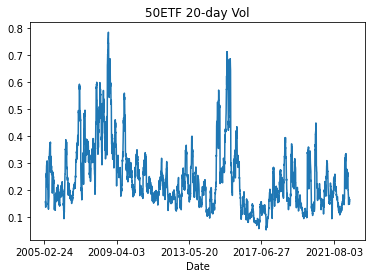

In [158]:
#波动率的聚集特性
ETF_50_volatility['20-day vol'] .plot(title = '50ETF 20-day Vol')

<AxesSubplot:title={'center':'ETFSH_300 20-day Vol'}, xlabel='Date'>

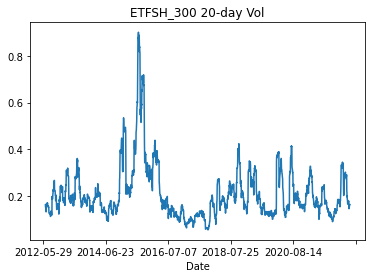

In [159]:
ETFSH_300_volatility['20-day vol'].plot(title = 'ETFSH_300 20-day Vol')

<AxesSubplot:title={'center':'ETFSZ_300 20-day Vol'}, xlabel='Date'>

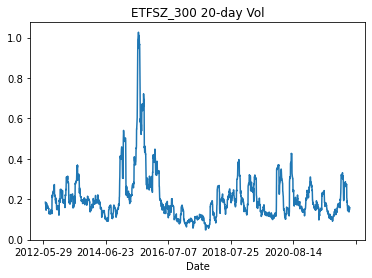

In [160]:
ETFSZ_300_volatility['20-day vol'].plot(title = 'ETFSZ_300 20-day Vol')

# 波动率的均值回归特性

In [94]:
#计算各周期波动率的分位数
quantile = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0] 
ETF_50_volatility_quantile = pd.DataFrame([])
ETF_50_volatility_quantile['5-day vol-q'] = ETF_50_volatility['5-day vol'].quantile(quantile)
ETF_50_volatility_quantile['20-day vol-q'] = ETF_50_volatility['20-day vol'].quantile(quantile)
ETF_50_volatility_quantile['40-day vol-q'] = ETF_50_volatility['40-day vol'].quantile(quantile)
ETF_50_volatility_quantile['60-day vol-q'] = ETF_50_volatility['60-day vol'].quantile(quantile)
ETF_50_volatility_quantile['120-day vol-q'] = ETF_50_volatility['120-day vol'].quantile(quantile)
ETF_50_volatility_quantile['250-day vol-q'] = ETF_50_volatility['250-day vol'].quantile(quantile)


In [90]:
#计算各周期波动率的分位数
quantile = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0] 
ETFSH_300_volatility_quantile = pd.DataFrame([])
ETFSH_300_volatility_quantile['5-day vol-q'] = ETFSH_300_volatility['5-day vol'].quantile(quantile)
ETFSH_300_volatility_quantile['20-day vol-q'] = ETFSH_300_volatility['20-day vol'].quantile(quantile)
ETFSH_300_volatility_quantile['40-day vol-q'] = ETFSH_300_volatility['40-day vol'].quantile(quantile)
ETFSH_300_volatility_quantile['60-day vol-q'] = ETFSH_300_volatility['60-day vol'].quantile(quantile)
ETFSH_300_volatility_quantile['120-day vol-q'] = ETFSH_300_volatility['120-day vol'].quantile(quantile)
ETFSH_300_volatility_quantile['250-day vol-q'] = ETFSH_300_volatility['250-day vol'].quantile(quantile)


In [89]:
#计算各周期波动率的分位数
quantile = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0] 
ETFSZ_300_volatility_quantile = pd.DataFrame([])
ETFSZ_300_volatility_quantile['5-day vol-q'] = ETFSZ_300_volatility['5-day vol'].quantile(quantile)
ETFSZ_300_volatility_quantile['20-day vol-q'] = ETFSZ_300_volatility['20-day vol'].quantile(quantile)
ETFSZ_300_volatility_quantile['40-day vol-q'] = ETFSZ_300_volatility['40-day vol'].quantile(quantile)
ETFSZ_300_volatility_quantile['60-day vol-q'] = ETFSZ_300_volatility['60-day vol'].quantile(quantile)
ETFSZ_300_volatility_quantile['120-day vol-q'] = ETFSZ_300_volatility['120-day vol'].quantile(quantile)
ETFSZ_300_volatility_quantile['250-day vol-q'] = ETFSZ_300_volatility['250-day vol'].quantile(quantile)


In [66]:
ETF_50_volatility_quantile

,5-day vol-q,20-day vol-q,40-day vol-q,60-day vol-q,120-day vol-q,250-day vol-q
0.0,0.000000,0.053909,0.078846,0.080255,0.096315,0.109037
0.1,0.093855,0.124966,0.131556,0.136905,0.146765,0.175542
0.2,0.120876,0.152174,0.163953,0.169015,0.180644,0.195756
0.3,0.143416,0.173781,0.180454,0.185602,0.196972,0.209459
0.4,0.167034,0.191165,0.199914,0.208406,0.212790,0.219051
0.5,0.194446,0.210845,0.224765,0.227188,0.234981,0.226297
0.6,0.223447,0.243499,0.250258,0.252306,0.249797,0.243613
0.7,0.262414,0.277698,0.276793,0.279341,0.262575,0.277285
0.8,0.316905,0.323196,0.321369,0.319540,0.342032,0.342575
0.9,0.405168,0.401090,0.407112,0.414509,0.399057,0.409158


In [92]:
ETFSH_300_volatility_quantile

,5-day vol-q,20-day vol-q,40-day vol-q,60-day vol-q,120-day vol-q,250-day vol-q
0.0,0.021724,0.053501,0.059149,0.076778,0.094479,0.103298
0.1,0.076663,0.111656,0.117314,0.118469,0.122332,0.132674
0.2,0.101064,0.129186,0.133847,0.136805,0.147958,0.169746
0.3,0.122728,0.146417,0.152902,0.157908,0.173103,0.190978
0.4,0.141309,0.161037,0.168612,0.175946,0.187233,0.202242
0.5,0.160424,0.177172,0.183370,0.191318,0.208434,0.215570
0.6,0.183285,0.192989,0.207718,0.219076,0.222302,0.220747
0.7,0.213362,0.222828,0.241167,0.241268,0.236903,0.229222
0.8,0.252154,0.279169,0.276223,0.267965,0.252162,0.243806
0.9,0.337884,0.343090,0.327311,0.314657,0.321521,0.399559


In [91]:
ETFSZ_300_volatility_quantile

,5-day vol-q,20-day vol-q,40-day vol-q,60-day vol-q,120-day vol-q,250-day vol-q
0.0,0.000000,0.047774,0.059446,0.071845,0.091027,0.099342
0.1,0.076163,0.104502,0.111113,0.116947,0.114375,0.128070
0.2,0.098554,0.125158,0.134057,0.134720,0.145268,0.169733
0.3,0.118353,0.145225,0.150799,0.155539,0.169476,0.185779
0.4,0.136469,0.161351,0.166176,0.178083,0.186632,0.200607
0.5,0.158582,0.177505,0.185690,0.191074,0.202883,0.212147
0.6,0.180887,0.194385,0.204435,0.214040,0.221455,0.220425
0.7,0.209486,0.219877,0.232534,0.235187,0.232974,0.226777
0.8,0.249241,0.267420,0.263866,0.267446,0.244180,0.238742
0.9,0.328326,0.327275,0.318035,0.309356,0.318915,0.420590


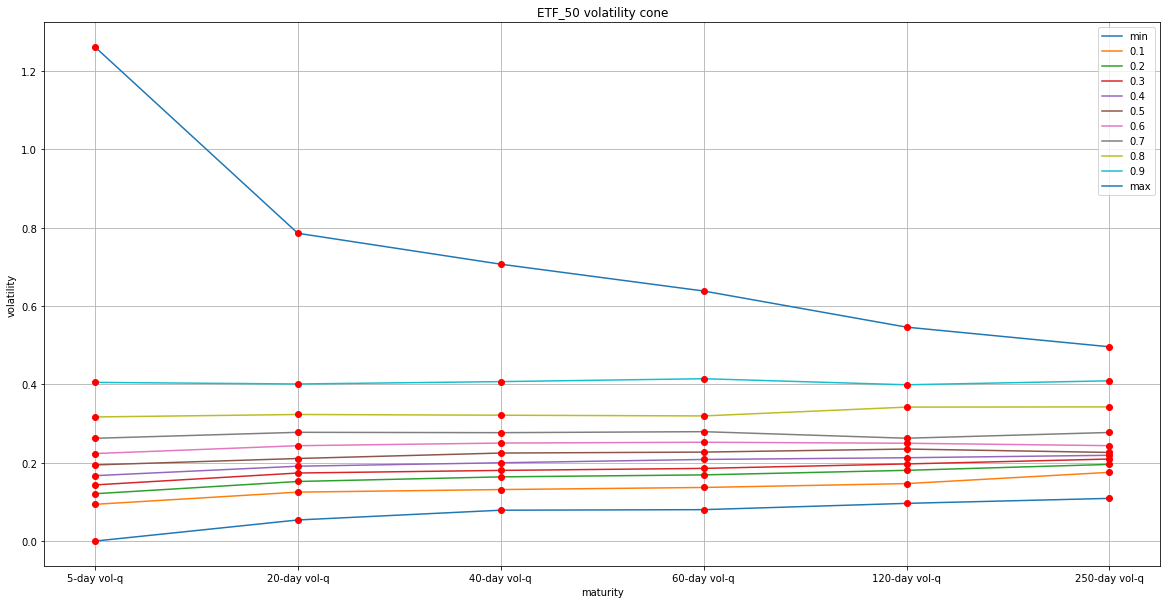

In [95]:
#绘制波动率锥
#对波动率分位数进行转置
ETF_50_volatility_quantile = ETF_50_volatility_quantile.T
ETF_50_volatility_quantile
#绘图
plt.figure(figsize=(20, 10))
plt.plot(ETF_50_volatility_quantile[[0.0]],label = 'min',lw = 1.5)
plt.plot(ETF_50_volatility_quantile[[0.1]],label = '0.1',lw = 1.5)
plt.plot(ETF_50_volatility_quantile[[0.2]],label = '0.2',lw = 1.5)
plt.plot(ETF_50_volatility_quantile[[0.3]],label = '0.3',lw = 1.5)
plt.plot(ETF_50_volatility_quantile[[0.4]],label = '0.4',lw = 1.5)
plt.plot(ETF_50_volatility_quantile[[0.5]],label = '0.5',lw = 1.5)
plt.plot(ETF_50_volatility_quantile[[0.6]],label = '0.6',lw = 1.5)
plt.plot(ETF_50_volatility_quantile[[0.7]],label = '0.7',lw = 1.5)
plt.plot(ETF_50_volatility_quantile[[0.8]],label = '0.8',lw = 1.5)
plt.plot(ETF_50_volatility_quantile[[0.9]],label = '0.9',lw = 1.5)
plt.plot(ETF_50_volatility_quantile[[1.0]],label = 'max',lw = 1.5)
plt.plot(ETF_50_volatility_quantile,'ro')
plt.grid(True)
plt.legend(loc=0)
plt.title('ETF_50 volatility cone')
plt.xlabel('maturity')
plt.ylabel('volatility')
plt.show()

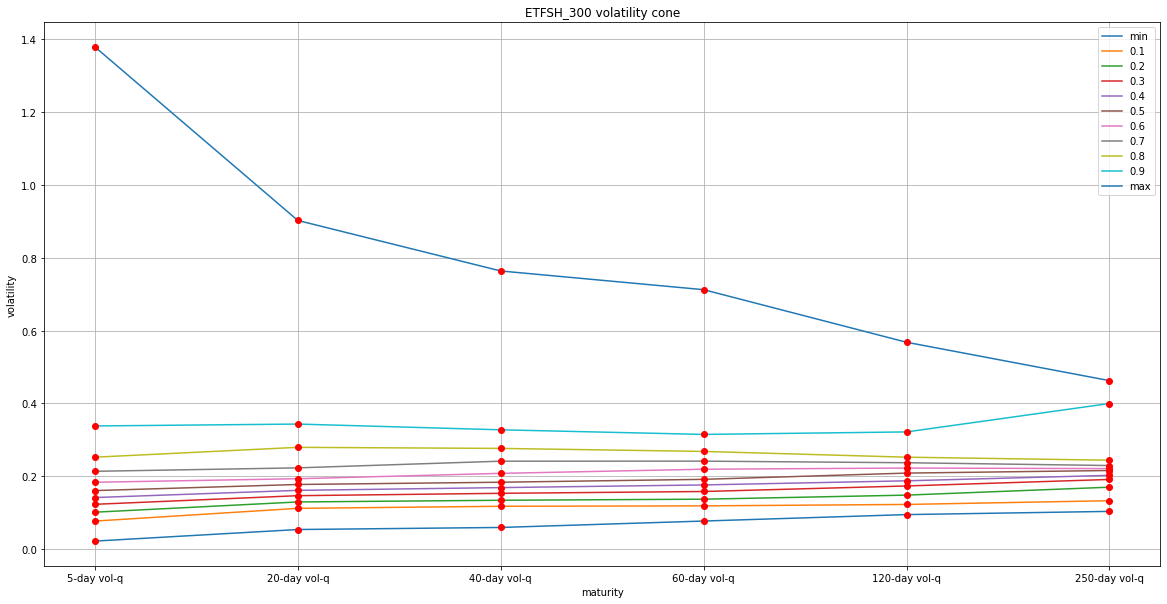

In [96]:
#绘制波动率锥
#对波动率分位数进行转置
ETFSH_300_volatility_quantile = ETFSH_300_volatility_quantile.T
ETFSH_300_volatility_quantile
#绘图
plt.figure(figsize=(20, 10))
plt.plot(ETFSH_300_volatility_quantile[[0.0]],label = 'min',lw = 1.5)
plt.plot(ETFSH_300_volatility_quantile[[0.1]],label = '0.1',lw = 1.5)
plt.plot(ETFSH_300_volatility_quantile[[0.2]],label = '0.2',lw = 1.5)
plt.plot(ETFSH_300_volatility_quantile[[0.3]],label = '0.3',lw = 1.5)
plt.plot(ETFSH_300_volatility_quantile[[0.4]],label = '0.4',lw = 1.5)
plt.plot(ETFSH_300_volatility_quantile[[0.5]],label = '0.5',lw = 1.5)
plt.plot(ETFSH_300_volatility_quantile[[0.6]],label = '0.6',lw = 1.5)
plt.plot(ETFSH_300_volatility_quantile[[0.7]],label = '0.7',lw = 1.5)
plt.plot(ETFSH_300_volatility_quantile[[0.8]],label = '0.8',lw = 1.5)
plt.plot(ETFSH_300_volatility_quantile[[0.9]],label = '0.9',lw = 1.5)
plt.plot(ETFSH_300_volatility_quantile[[1.0]],label = 'max',lw = 1.5)
plt.plot(ETFSH_300_volatility_quantile,'ro')
plt.grid(True)
plt.legend(loc=0)
plt.title('ETFSH_300 volatility cone')
plt.xlabel('maturity')
plt.ylabel('volatility')
plt.show()

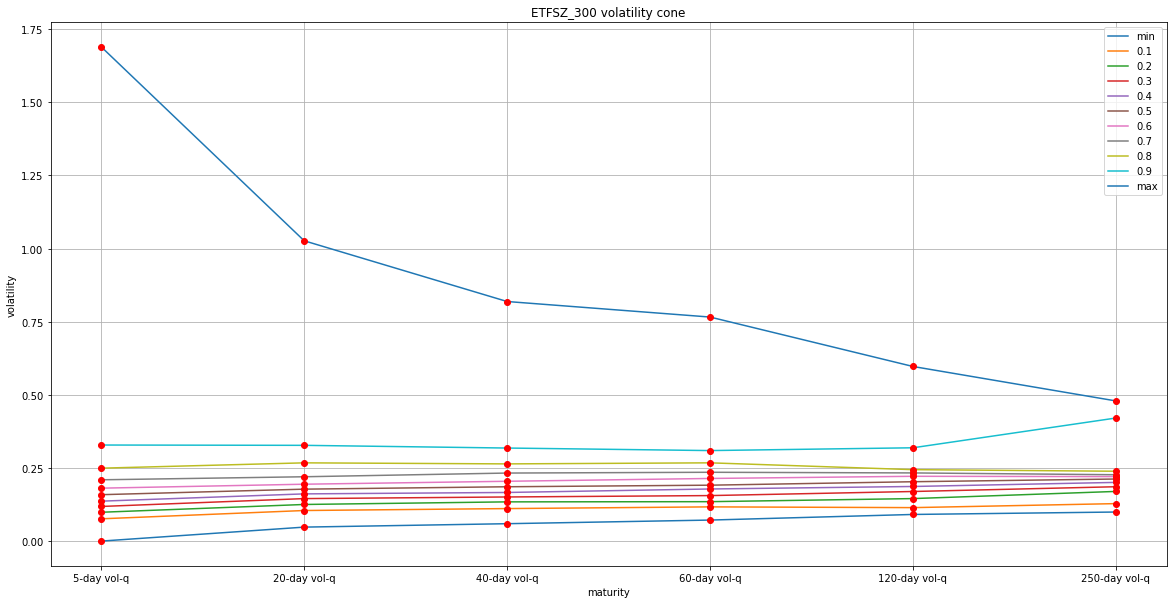

In [97]:
#绘制波动率锥
#对波动率分位数进行转置
ETFSZ_300_volatility_quantile = ETFSZ_300_volatility_quantile.T
ETFSZ_300_volatility_quantile
#绘图
plt.figure(figsize=(20, 10))
plt.plot(ETFSZ_300_volatility_quantile[[0.0]],label = 'min',lw = 1.5)
plt.plot(ETFSZ_300_volatility_quantile[[0.1]],label = '0.1',lw = 1.5)
plt.plot(ETFSZ_300_volatility_quantile[[0.2]],label = '0.2',lw = 1.5)
plt.plot(ETFSZ_300_volatility_quantile[[0.3]],label = '0.3',lw = 1.5)
plt.plot(ETFSZ_300_volatility_quantile[[0.4]],label = '0.4',lw = 1.5)
plt.plot(ETFSZ_300_volatility_quantile[[0.5]],label = '0.5',lw = 1.5)
plt.plot(ETFSZ_300_volatility_quantile[[0.6]],label = '0.6',lw = 1.5)
plt.plot(ETFSZ_300_volatility_quantile[[0.7]],label = '0.7',lw = 1.5)
plt.plot(ETFSZ_300_volatility_quantile[[0.8]],label = '0.8',lw = 1.5)
plt.plot(ETFSZ_300_volatility_quantile[[0.9]],label = '0.9',lw = 1.5)
plt.plot(ETFSZ_300_volatility_quantile[[1.0]],label = 'max',lw = 1.5)
plt.plot(ETFSZ_300_volatility_quantile,'ro')
plt.grid(True)
plt.legend(loc=0)
plt.title('ETFSZ_300 volatility cone')
plt.xlabel('maturity')
plt.ylabel('volatility')
plt.show()

# 波动率的概率分布

/Users/tuyuan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='5-day vol', ylabel='Density'>

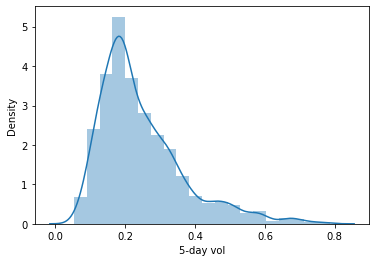

In [171]:
#概率分布图
import seaborn as sns
sns.distplot(ETF_50_volatility['5-day vol'],bins = 20)

/Users/tuyuan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='5-day vol', ylabel='Density'>

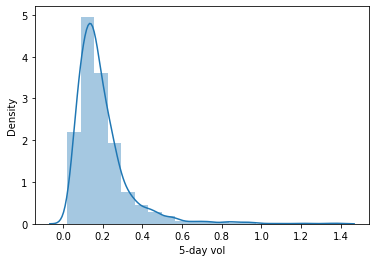

In [140]:
#概率分布图
import seaborn as sns
sns.distplot(ETFSH_300_volatility['5-day vol'],bins = 20)

/Users/tuyuan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='5-day vol', ylabel='Density'>

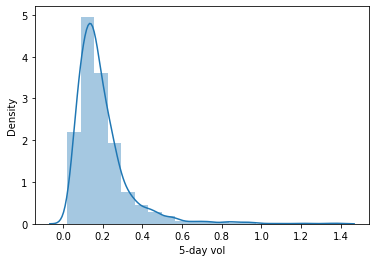

In [141]:
#概率分布图
import seaborn as sns
sns.distplot(ETFSH_300_volatility['5-day vol'],bins = 20)

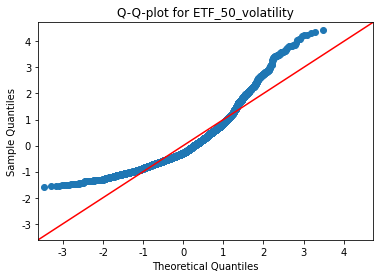

In [167]:
#QQ-Plot图
ETF_50_volatility = ETF_50_volatility.dropna()
sm.qqplot(ETF_50_volatility['5-day vol'],stats.norm, fit=True, line='45')
plt.title("Q-Q-plot for ETF_50_volatility")
plt.show()

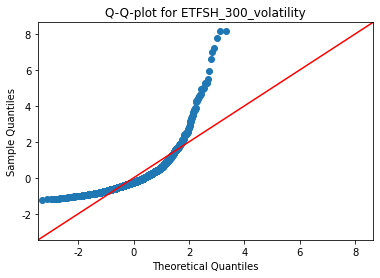

In [166]:
#QQ-Plot图
ETFSH_300_volatility = ETFSH_300_volatility.dropna()
sm.qqplot(ETFSH_300_volatility['5-day vol'],stats.norm, fit=True, line='45')
plt.title("Q-Q-plot for ETFSH_300_volatility")
plt.show()

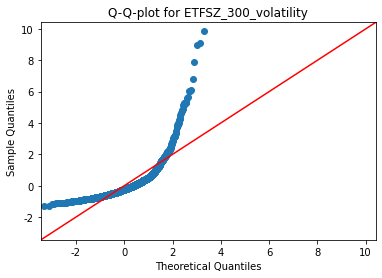

In [168]:
#QQ-Plot图
ETFSZ_300_volatility = ETFSZ_300_volatility.dropna()
sm.qqplot(ETFSZ_300_volatility['5-day vol'],stats.norm, fit=True, line='45')
plt.title("Q-Q-plot for ETFSZ_300_volatility")
plt.show()

In [147]:
#波动率与收益率的相关性：绝对值正相关。

<AxesSubplot:xlabel='Date'>

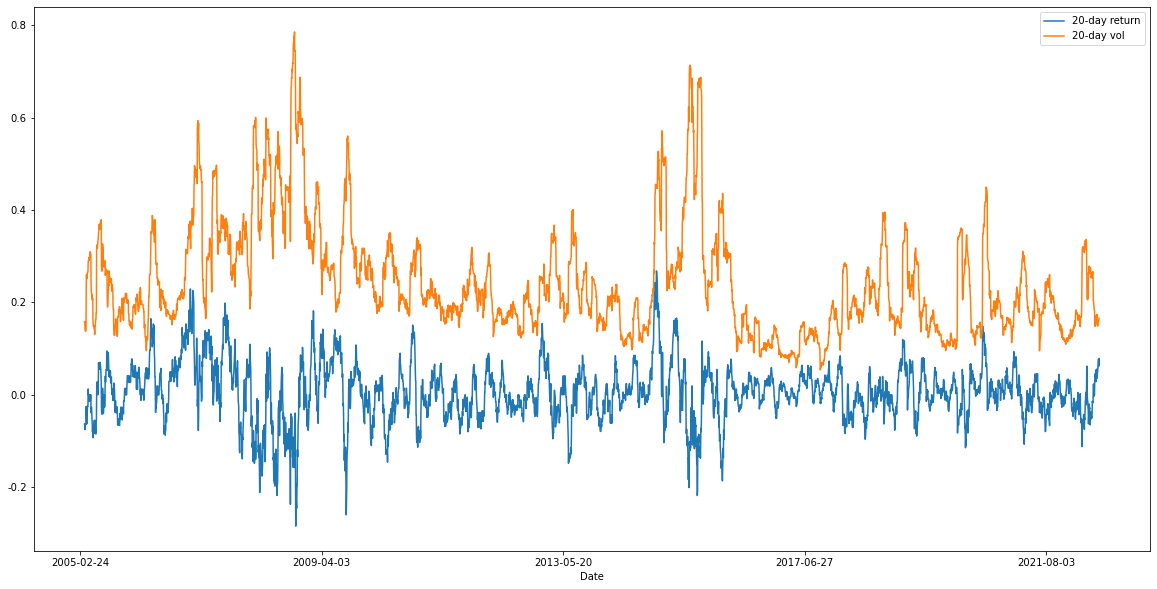

In [157]:
#
ETF_50_volatility['20-day vol'] = ETF_50['Return_Gm'].rolling(window = 20).std()* np.sqrt(250)
ETF_50_volatility['20-day return'] = ETF_50['Return_Gm'].rolling(window = 20).mean()* np.sqrt(250)
ETF_50_volatility[['20-day return','20-day vol']].plot(figsize=(20, 10))

<AxesSubplot:xlabel='Date'>

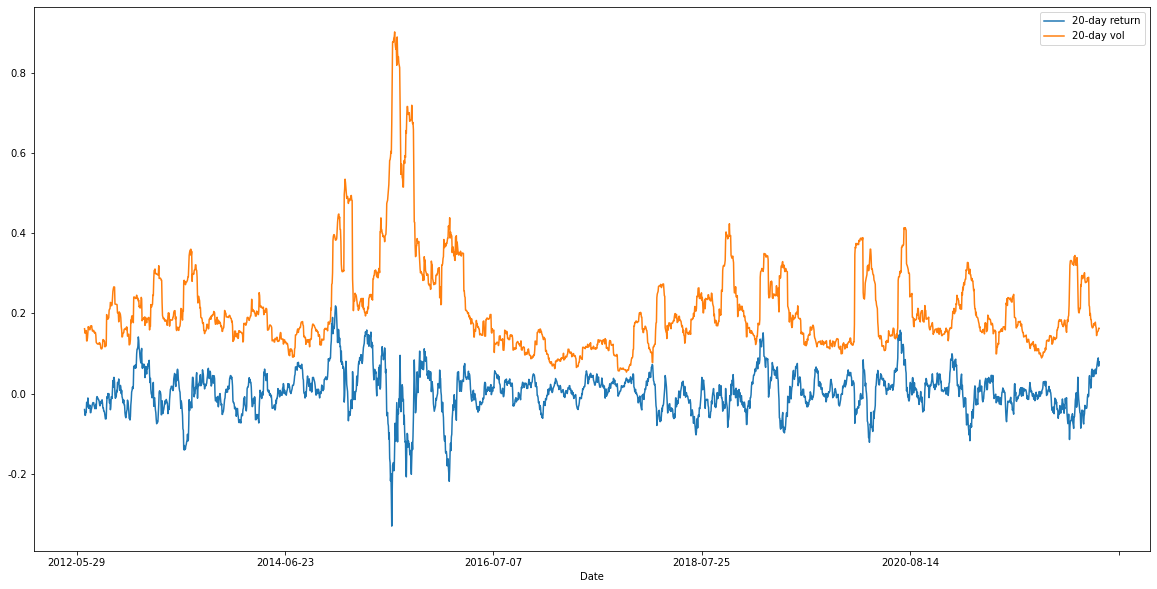

In [156]:
#5日波动率
ETFSH_300_volatility['20-day vol'] = ETFSH_300['Return_Gm'].rolling(window = 20).std()* np.sqrt(250)
ETFSH_300_volatility['20-day return'] = ETFSH_300['Return_Gm'].rolling(window = 20).mean()* np.sqrt(250)
ETFSH_300_volatility[['20-day return','20-day vol']].plot(figsize=(20, 10))

<AxesSubplot:xlabel='Date'>

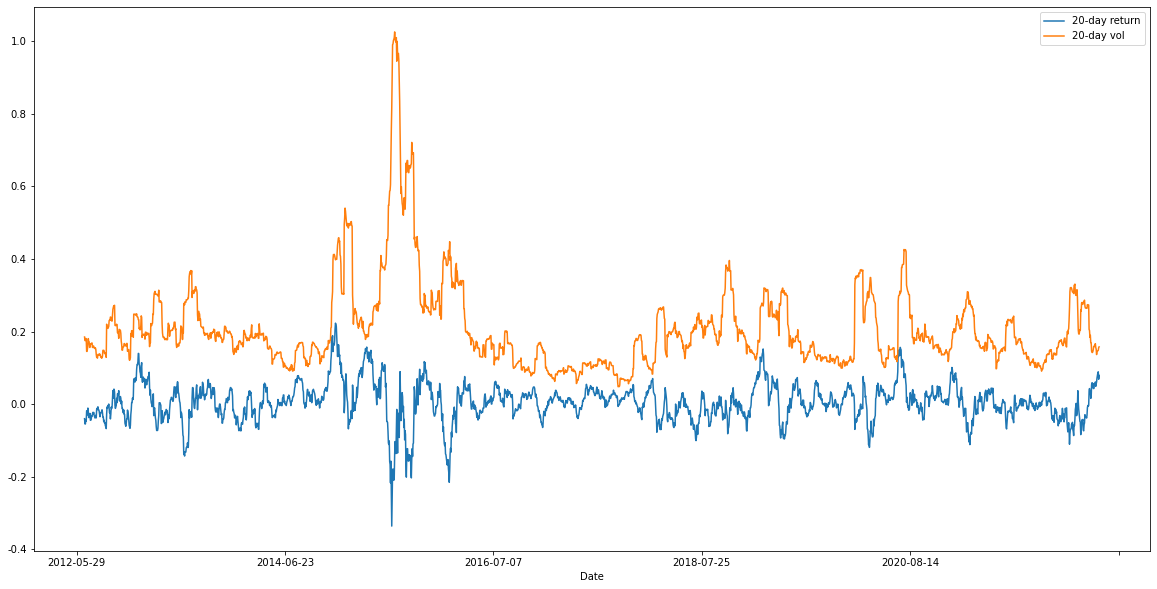

In [155]:
#20日波动率
ETFSZ_300_volatility['20-day vol'] = ETFSZ_300['Return_Gm'].rolling(window = 20).std()* np.sqrt(250)
ETFSZ_300_volatility['20-day return'] = ETFSZ_300['Return_Gm'].rolling(window = 20).mean()* np.sqrt(250)
ETFSZ_300_volatility[['20-day return','20-day vol']].plot(figsize=(20, 10))